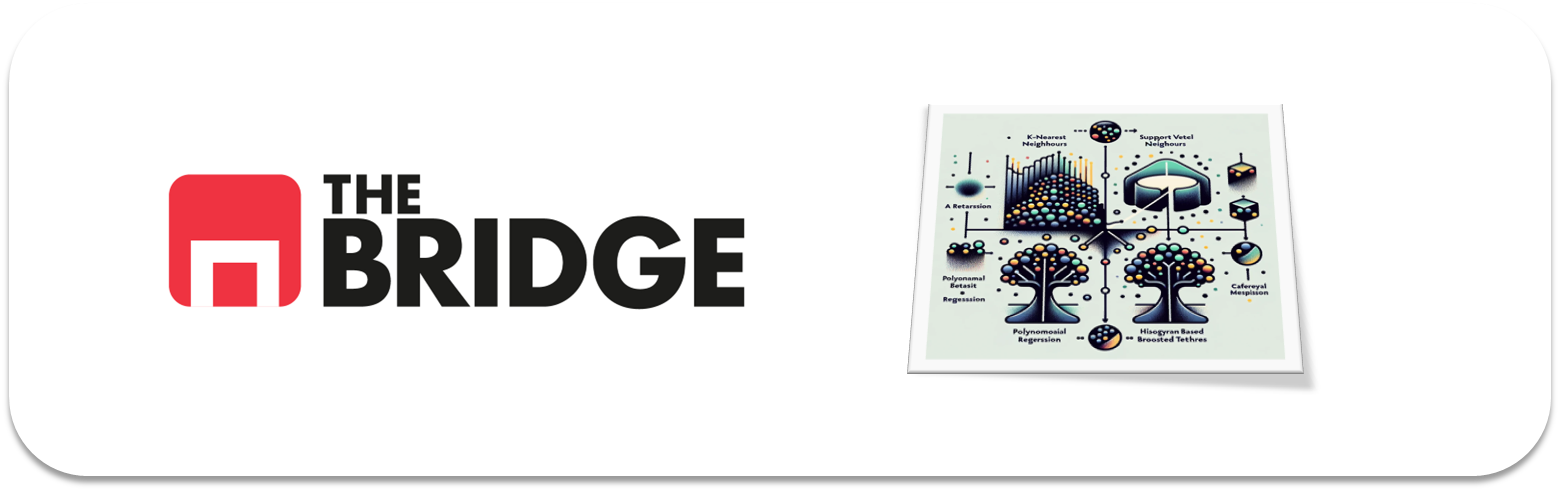

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import tool_box as tb
import bootcampviztools as bcv

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [3]:
df = pd.read_csv("./data/credit_npo.csv")
df.sample(15)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7175,0,1.000000,31,0,0.045350,1300.0,2,0,0,0,1.0
6263,0,0.223835,53,0,0.183882,10000.0,11,0,1,0,0.0
11758,0,0.009379,77,0,17.000000,NaN,8,0,0,0,0.0
9891,0,0.743473,40,0,0.967576,3700.0,7,0,3,0,0.0
8382,0,0.016791,29,0,0.236339,2250.0,8,0,0,1,1.0
1613,0,0.006354,56,0,0.376128,2990.0,10,0,1,0,4.0
12381,0,0.301621,45,0,0.506721,9000.0,11,0,2,0,4.0
5828,0,0.378107,41,0,0.379946,7100.0,14,0,2,0,0.0
10058,0,0.015297,31,0,0.139018,2157.0,3,0,0,0,0.0
54,0,0.000000,80,1,0.034271,1954.0,7,0,0,0,0.0


In [4]:
tb.describe_df(df)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
DATA_TYPE,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,5.75,0.0,0.0,0.0,0.0,1.41
UNIQUE_VALUES,2,10764,78,10,11547,4167,43,13,16,8,10
CARDIN (%),0.02,85.86,0.62,0.08,92.1,33.24,0.34,0.1,0.13,0.06,0.08


In [5]:
df.MonthlyIncome.describe()

count     11816.000000
mean       6864.815420
std       11855.905437
min           0.000000
25%        3498.750000
50%        5416.000000
75%        8300.000000
max      702500.000000
Name: MonthlyIncome, dtype: float64

In [6]:
tb.tipifica_variables(df)

,Categoria
SeriousDlqin2yrs,Binaria
RevolvingUtilizationOfUnsecuredLines,Numérica continua
age,Numérica discreta
NumberOfTime30-59DaysPastDueNotWorse,Numérica discreta
DebtRatio,Numérica continua
MonthlyIncome,Numérica continua
NumberOfOpenCreditLinesAndLoans,Numérica discreta
NumberOfTimes90DaysLate,Numérica discreta
NumberRealEstateLoansOrLines,Numérica discreta
NumberOfTime60-89DaysPastDueNotWorse,Categórica


In [7]:
#df.columns = [col.replace("-","_").replace(" ","_").lower() for col in df.columns]

In [8]:
df.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

- Un problema de clasificación cuya variable target es 'SeriousDlqin2yrs' que es binaria

### #1.3
Pinta la distribución de frecuencias del target y coméntala

<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

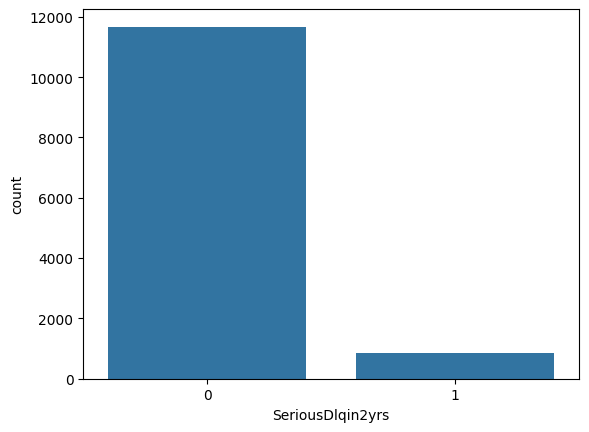

In [10]:
sns.countplot(data= df, x="SeriousDlqin2yrs")

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [11]:
train_set, test_set = train_test_split(df, test_size=0.20, random_state=42)

In [12]:
target = 'SeriousDlqin2yrs'

- 5%NAN en la columna 'MonthlyIncome' y 'NumberOfDependents', imputamos la mediana

In [13]:
train_set.loc[train_set['MonthlyIncome'].isna(), 'MonthlyIncome'] = train_set['MonthlyIncome'].quantile(0.5)

In [14]:
test_set.loc[test_set['MonthlyIncome'].isna(), 'MonthlyIncome'] = train_set['MonthlyIncome'].quantile(0.5)

In [15]:
train_set.NumberOfDependents.value_counts(dropna=False)

NumberOfDependents
0.0     5560
1.0     1898
2.0     1462
3.0      698
4.0      197
NaN      140
5.0       52
6.0       19
10.0       1
7.0        1
8.0        1
Name: count, dtype: int64

In [16]:
train_set.NumberOfDependents.describe()

count    9889.000000
mean        0.819395
std         1.134976
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: NumberOfDependents, dtype: float64

In [17]:
train_set.loc[train_set['NumberOfDependents'].isna(), 'NumberOfDependents'] = train_set['NumberOfDependents'].quantile(0.5)
test_set.loc[test_set['NumberOfDependents'].isna(), 'NumberOfDependents'] = train_set['NumberOfDependents'].quantile(0.5)

In [18]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

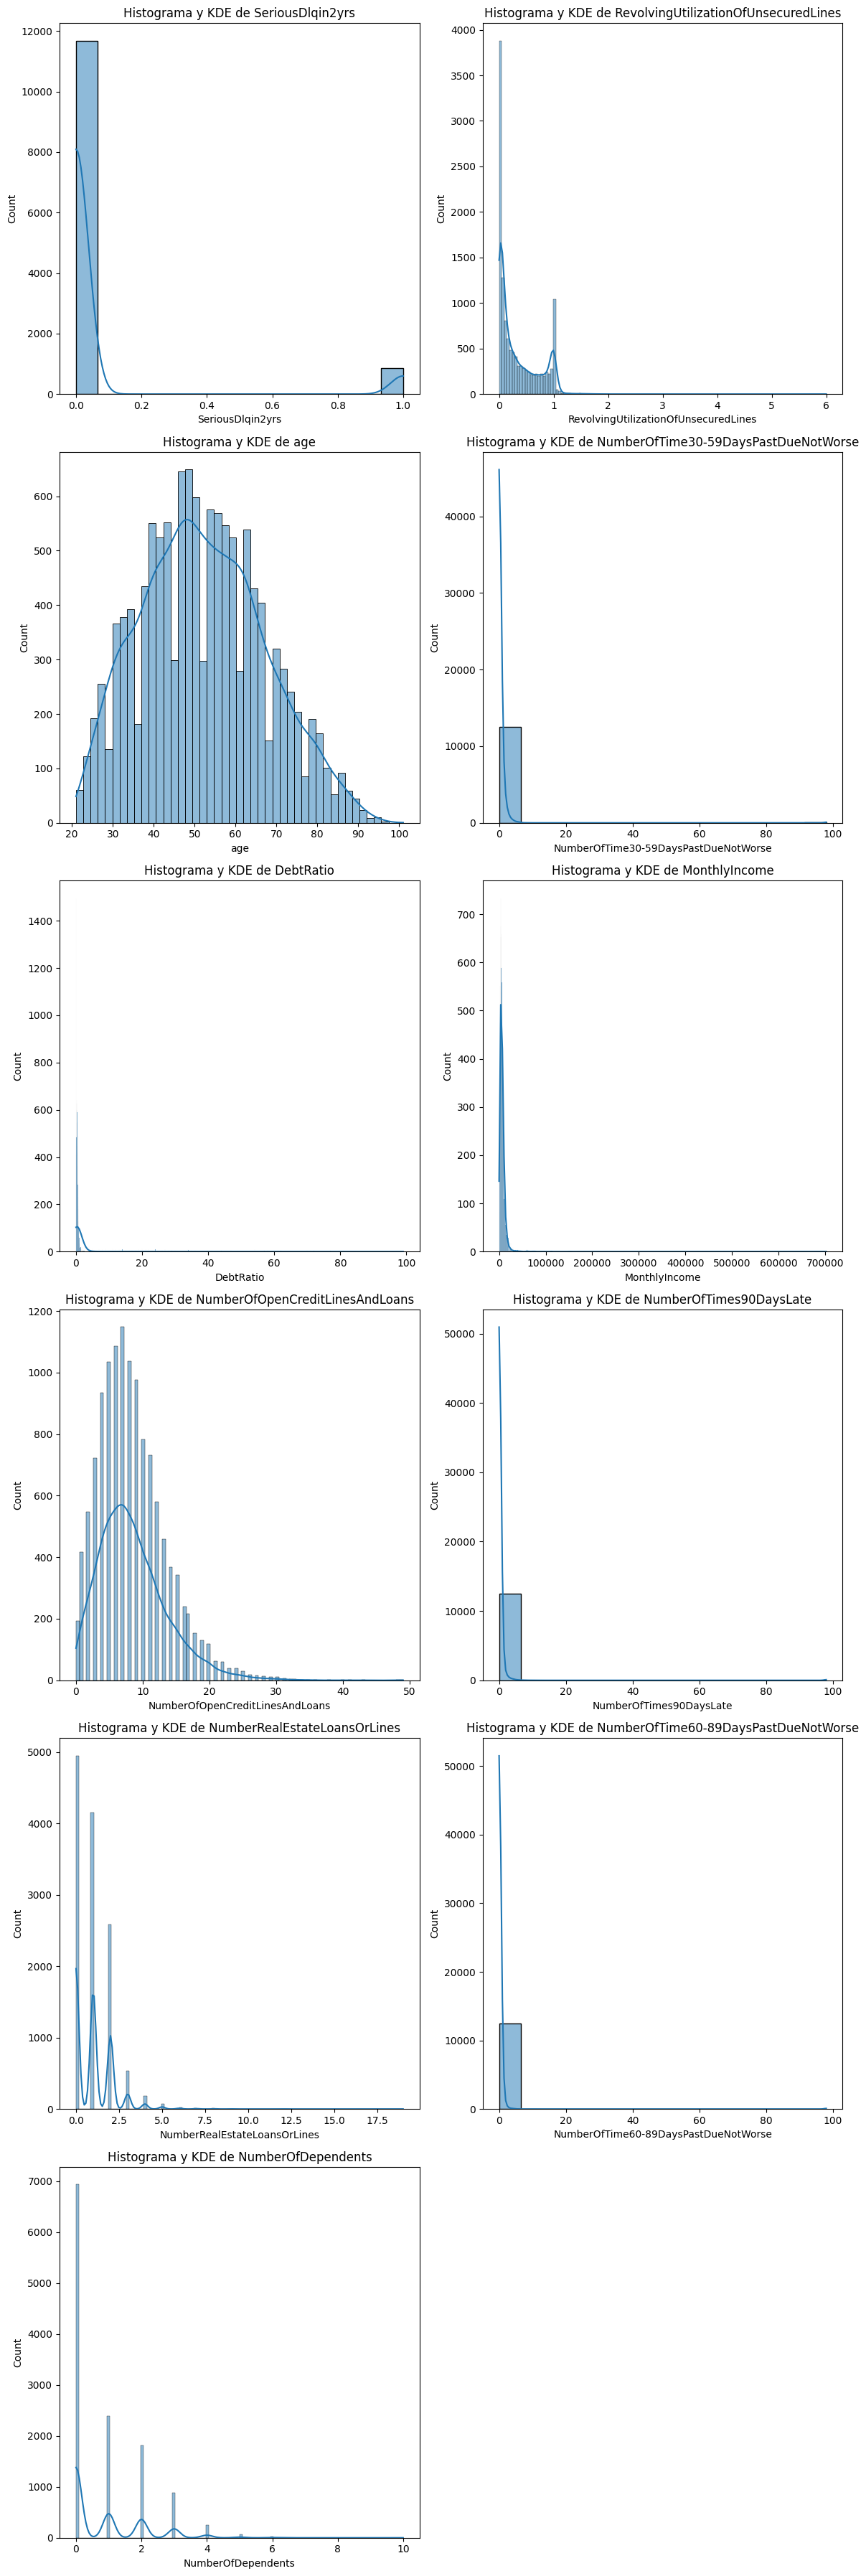

In [19]:
columnas_numericas = df.describe().columns.to_list()

plot_histo_den(df,columnas_numericas)
    

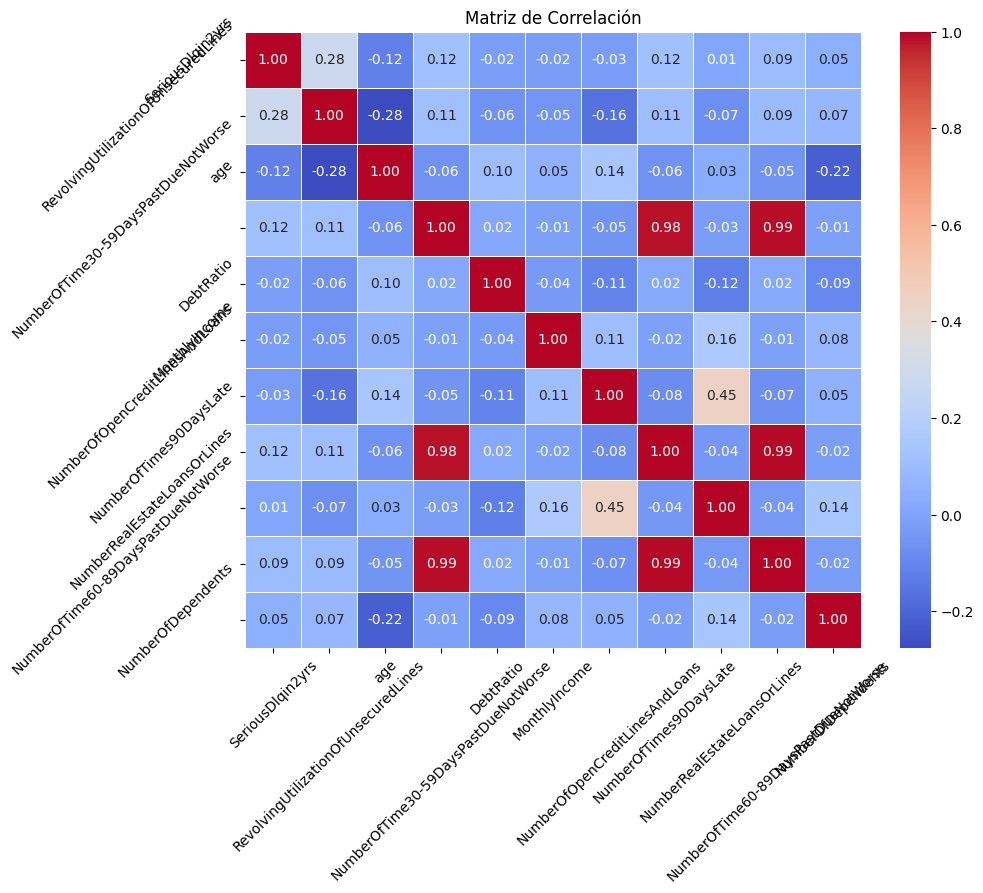

In [30]:
corr_matrix = df.corr(numeric_only= True)
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

In [39]:
from scipy.stats import pearsonr
def umbrales_numericas(dataframe, target_col, umbral_corr):
    lista_columnas = []
    tabla = dataframe.drop(target_col, axis=1)
    for col in tabla.columns:
        if dataframe[col].dtype != 'object' and dataframe[col].dtype != 'bool':
            corrs = pearsonr(dataframe[target_col], dataframe[col])
            if np.abs(corrs[0]) > umbral_corr:
                lista_columnas.append(col)

    lista_columnas.insert(0, target_col)
    corr_matrix = dataframe[lista_columnas].corr()
    figura = plt.figure(figsize=(10,10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"
    plt.title('Matriz de Correlación')
    plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
    plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario
    lista_columnas.remove(target_col)

    return lista_columnas

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate']

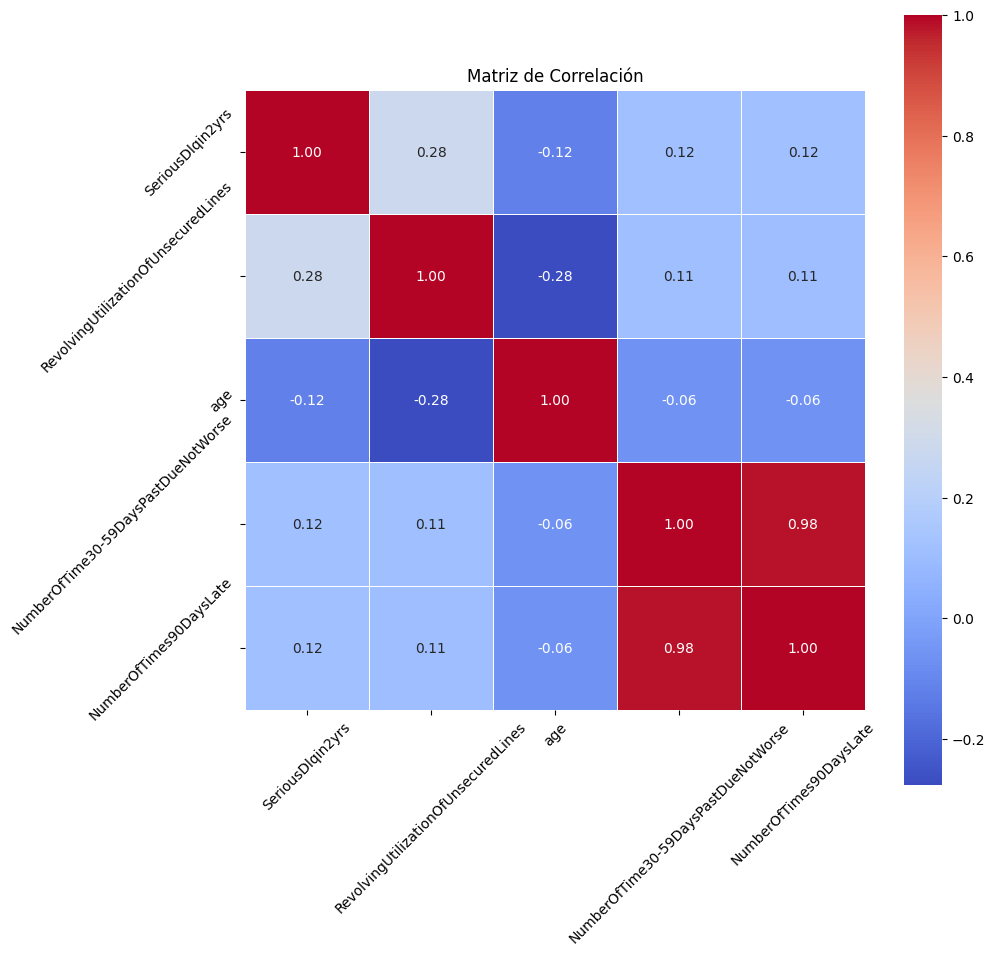

In [40]:
feat_corr = umbrales_numericas(df, target, 0.1)
feat_corr

In [ ]:
numberOf = [col for col in train_set if col.startswith("NumberOfTime")]
for col in numberOf:
    print(f"Para pagadores, value_counts de {col}")
    print(train_set[train_set[target]== 0][col].value_counts(True))
    print(f"Para impagadores")
    print(train_set[train_set[target]==1][col].value_counts(True))
    print("****")

- Creamos primero train y set con el total de las columnas

In [20]:
X_train = train_set.drop('SeriousDlqin2yrs', axis = 1)
X_test = test_set.drop('SeriousDlqin2yrs', axis = 1)
y_train = train_set[target]
y_test = test_set[target]

- Creamos también otro train y test con las variables que presentan mayor correlación. Compararemos luego los modelos 

In [42]:
X_train_corr = train_set[feat_corr]
X_test_corr = test_set[feat_corr]

In [45]:
X_train_corr.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate
5441,0.089036,51,0,0
3948,0.019472,73,0,0
8819,0.000000,28,1,0
315,1.000000,40,0,0
10746,0.409016,61,0,0


- Entrenamos los modelos a probar. En este caso cogeremos 5 diferentes.

In [21]:
rf_clf = RandomForestClassifier(random_state= 42)
xgb_clf = XGBClassifier(random_state = 42)
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)
knn = KNeighborsClassifier(n_neighbors=3)
tree_clf = DecisionTreeClassifier(random_state= 42)

model_names = ["DecisionTree","Random Forest","XGBoost","LightGBM","KNN"]
model_set = [tree_clf, rf_clf, xgb_clf, lgb_clf, knn]

- Comprobamos metricas de modelos con validacion cruzada para el total de las variables

In [22]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    
    metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

In [23]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <DecisionTree>, Accuracy_CV: 0.6092032285158819
Model <Random Forest>, Accuracy_CV: 0.5783144518910313
Model <XGBoost>, Accuracy_CV: 0.5930982176586792
Model <LightGBM>, Accuracy_CV: 0.5919332373063999
Model <KNN>, Accuracy_CV: 0.5064198295591366
El ganador es DecisionTree


- Comprobamos metricas de los modelos para las varibales escogidas de mayor correlacion. NO VALE, la correlacion hecha ha sido pearson y deberia de haberse utilizado Umanywhitney porque el target es binario y no numerico

In [46]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    
    metricas_cv[nombre] = cross_val_score(modelo, X_train_corr, y_train, cv = 5, scoring = "balanced_accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

In [47]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <DecisionTree>, Accuracy_CV: 0.5947159212098425
Model <Random Forest>, Accuracy_CV: 0.5915762936501634
Model <XGBoost>, Accuracy_CV: 0.5868331304990793
Model <LightGBM>, Accuracy_CV: 0.581775699412658
Model <KNN>, Accuracy_CV: 0.5873699589713821
El ganador es DecisionTree


- Para ambos datasets, el modelo ganador con valores muy similares es el Árbol de decisión, siendo ligeramente superior el dataset con todas las variables.

- Optimizacion hiperparametros Arbol de decisión

In [72]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
tree_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    "max_depth": [1,2,4,8,None],
    "min_samples_leaf": [1,5,10,20],
    "max_features": ["sqrt","log2", None]
}

tree_grid = GridSearchCV(tree_clf, 
                            cv = 3,
                            param_grid= param_grid, 
                            scoring = "balanced_accuracy",
                            n_jobs = -1)

tree_grid.fit(X_train,y_train)
print("Tree best_score:", tree_grid.best_score_)


Tree best_score: 0.6198686254058502


In [56]:
tree_grid.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1}

In [57]:
tree_grid.best_score_

np.float64(0.6198686254058502)

- Matriz confusion frente a TRAIN

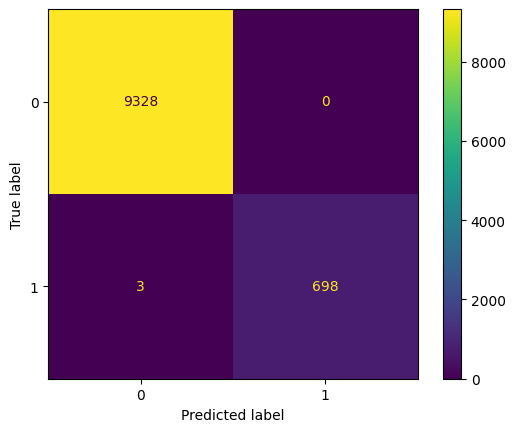

In [58]:
best_model = tree_grid.best_estimator_

ConfusionMatrixDisplay.from_predictions(y_train, best_model.predict(X_train))

In [61]:
print(classification_report(y_train, best_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9328
           1       1.00      1.00      1.00       701

    accuracy                           1.00     10029
   macro avg       1.00      1.00      1.00     10029
weighted avg       1.00      1.00      1.00     10029



- Metricas tan altas solo pueden indicar una premisa, OVERFITTING. Vamos a equilibrar los datos. Pero antes, probemos la prediccion a test

- Matriz confusion frente a TEST

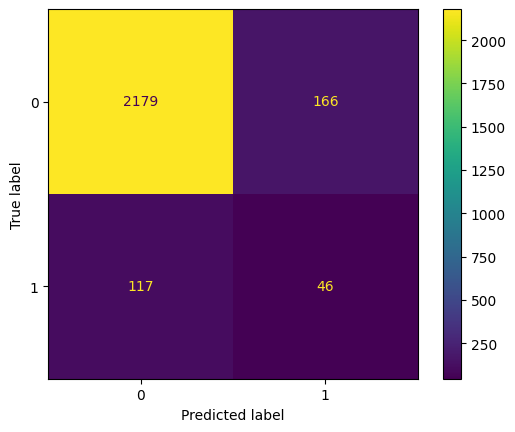

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test))

In [60]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2345
           1       0.22      0.28      0.25       163

    accuracy                           0.89      2508
   macro avg       0.58      0.61      0.59      2508
weighted avg       0.90      0.89      0.89      2508



- Regulacion desbalanceo. OVER-SAMPLING

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts(True)

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

In [64]:
tree_grid.fit(X_train_smote, y_train_smote)

y_pred_smote = tree_grid.predict(X_test)
print(classification_report(y_test, y_pred_smote ))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2345
           1       0.16      0.33      0.21       163

    accuracy                           0.84      2508
   macro avg       0.55      0.60      0.56      2508
weighted avg       0.90      0.84      0.87      2508



-UNDER_SAMPLING

In [24]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [66]:
tree_grid.fit(X_res, y_res)

y_pred_under = tree_grid.predict(X_test)
print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2345
           1       0.17      0.77      0.28       163

    accuracy                           0.74      2508
   macro avg       0.57      0.75      0.56      2508
weighted avg       0.93      0.74      0.80      2508



- Ajuste de Peso de Clases

In [69]:
tree_clf = DecisionTreeClassifier(random_state=42, class_weight = "balanced")
tree_clf.fit(X_train, y_train)
y_pred_class = tree_clf.predict(X_test)

In [70]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2345
           1       0.25      0.29      0.27       163

    accuracy                           0.90      2508
   macro avg       0.60      0.61      0.61      2508
weighted avg       0.90      0.90      0.90      2508



- El mejor balanceo es el Under-Sampling, con recall medio de 75